### Processamento de gráficos para Relatório de Conjuntura de Macroeconomia I
#### Aluno: Pedro Luís Rickli Torques
#### Semestre: 2025/1

#### Imports

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import sidrapy as sp
import numpy as np
import seaborn as sns

#### Exercício 1

##### a.

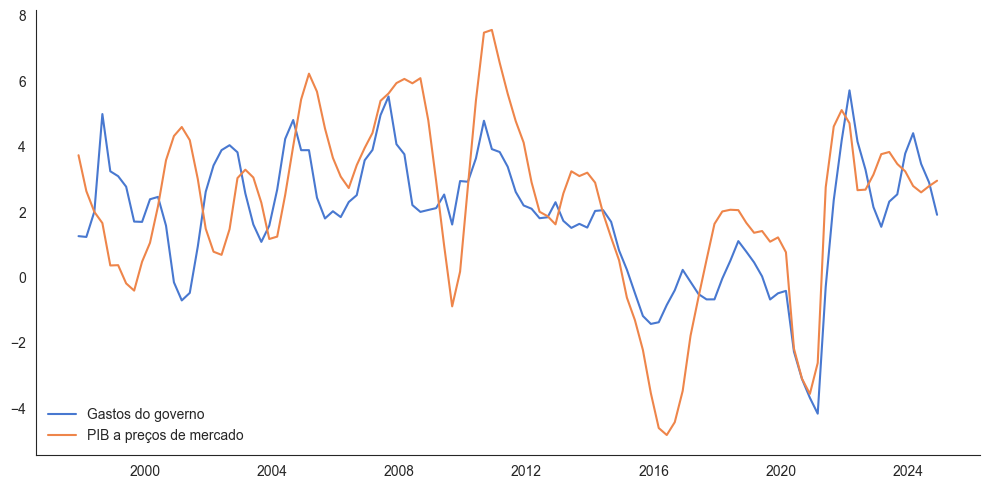

In [114]:
# Requisição
tb_1a_raw = sp.get_table(
    table_code="1621",
    territorial_level="1",
    ibge_territorial_code="all",
    classifications={"11255": "90707,93405"},
    period="all",
    format="pandas"
)

# Tratamento dos dados
tb_1a_raw.columns = tb_1a_raw.iloc[0]
tb_1a_raw = tb_1a_raw.iloc[1:, :]
tb_1a_raw['Valor'] = tb_1a_raw['Valor'].astype(float)
tb_1a = tb_1a_raw.rename(columns = {"Valor" : "values", "Setores e subsetores": "classif", "Trimestre (Código)" : "date"})[['date', 'values', 'classif']]
tb_1a['date'] = tb_1a['date'].str[:-2] + tb_1a['date'].str[-2:].replace({"01" : "03", "02" : "06", "03" : "09", "04" : "12"})
tb_1a = tb_1a.pivot_table(
    index=pd.to_datetime(tb_1a['date'], format = "%Y%m"),
    columns="classif",
    values="values"
)
tb_1a.rename(columns = {"Despesa de consumo da administração pública": "gov", "PIB a preços de mercado": "pib"}, inplace=True)

# Cálculo da média móvel
def med_mov(x):
    recent = x[-4:].sum()
    previous = x[:4].sum()
    return ((recent / previous)-1)*100 if previous != 0 else None
tb_1a[f'gov_mm'] = tb_1a["gov"].rolling(window=8).apply(med_mov, raw=False)
tb_1a[f'pib_mm'] = tb_1a["pib"].rolling(window=8).apply(med_mov, raw=False)


# Graficagem 
tb_1a.rename(columns = {"gov_mm": "Gastos do governo", "pib_mm": "PIB a preços de mercado"}, inplace=True)
tb_1a_long = tb_1a[["Gastos do governo", "PIB a preços de mercado"]].reset_index().melt(id_vars='date', var_name='classif', value_name='values')

sns.set_style("white")

plt.figure(figsize=(10, 5))
lineplot = sns.lineplot(
    data=tb_1a_long,
    x='date',
    y='values',
    hue='classif',
    palette="muted"
)

plt.xlabel(None)
plt.ylabel(None)
sns.despine()
plt.legend(frameon=False, loc='lower left')
plt.tight_layout()

plt.show()

##### b.

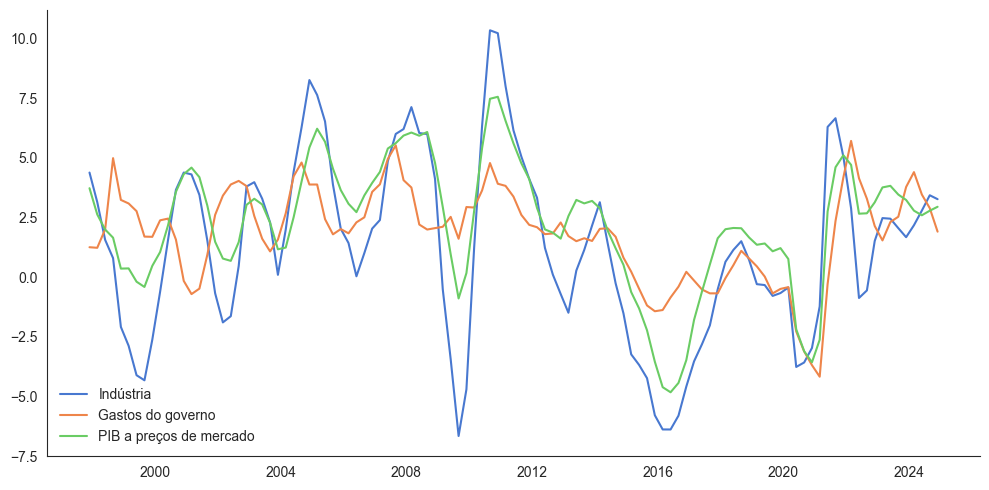

In [ ]:
# Requisição
tb_1b_raw = sp.get_table(
    table_code="1621",
    territorial_level="1",
    ibge_territorial_code="all",
    classifications={"11255": "90707,93405,90691"},
    period="all",
    format="pandas"
)

# Tratamento dos dados
tb_1b_raw.columns = tb_1b_raw.iloc[0]
tb_1b_raw = tb_1b_raw.iloc[1:, :]
tb_1b_raw['Valor'] = tb_1b_raw['Valor'].astype(float)
tb_1b = tb_1b_raw.rename(columns = {"Valor" : "values", "Setores e subsetores": "classif", "Trimestre (Código)" : "date"})[['date', 'values', 'classif']]
tb_1b['date'] = tb_1b['date'].str[:-2] + tb_1b['date'].str[-2:].replace({"01" : "03", "02" : "06", "03" : "09", "04" : "12"})
tb_1b = tb_1b.pivot_table(
    index=pd.to_datetime(tb_1b['date'], format = "%Y%m"),
    columns="classif",
    values="values"
)
tb_1b.rename(columns = {"Despesa de consumo da administração pública": "gov", "PIB a preços de mercado": "pib", "Indústria - total": "ind"}, inplace=True)

# Cálculo da média móvel
tb_1b[f'gov_mm'] = tb_1b["gov"].rolling(window=8).apply(med_mov, raw=False)
tb_1b[f'pib_mm'] = tb_1b["pib"].rolling(window=8).apply(med_mov, raw=False)
tb_1b[f'ind_mm'] = tb_1b["ind"].rolling(window=8).apply(med_mov, raw=False)



# Graficagem 
tb_1b.rename(columns = {"ind_mm": "Indústria", "gov_mm": "Gastos do governo", "pib_mm": "PIB a preços de mercado"}, inplace=True)
tb_1b_long = tb_1b[["Indústria", "Gastos do governo", "PIB a preços de mercado"]].reset_index().melt(id_vars='date', var_name='classif', value_name='values')

sns.set_style("white")

plt.figure(figsize=(10, 5))
lineplot = sns.lineplot(
    data=tb_1b_long,
    x='date',
    y='values',
    hue='classif',
    palette="muted"
)

plt.xlabel(None)
plt.ylabel(None)
sns.despine()
plt.legend(frameon=False, loc='lower left')
plt.tight_layout()

plt.show()

#### Exercício 2

##### a.

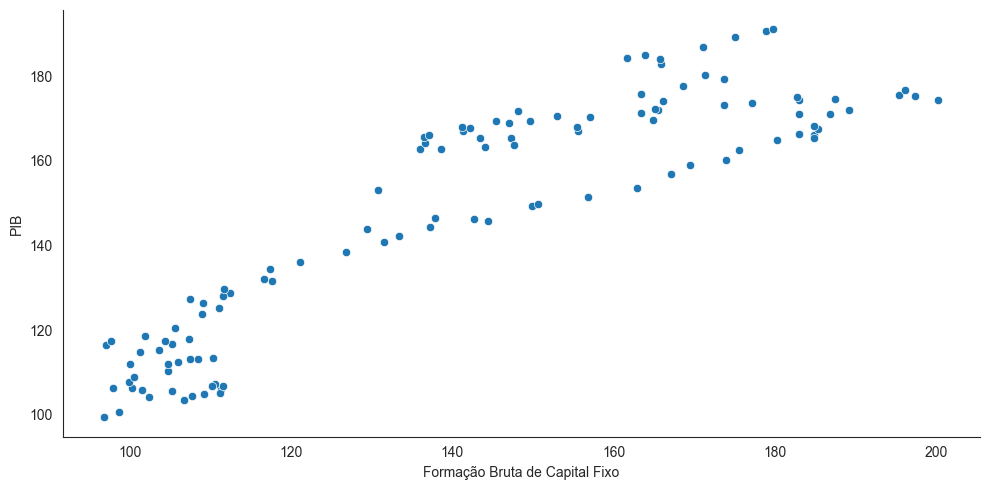

In [132]:
# Requisição
tb_2a_raw = sp.get_table(
    table_code="1621",
    territorial_level="1",
    ibge_territorial_code="all",
    classifications={"11255": "90707,93406"},
    period="all",
    format="pandas"
)

# Tratamento dos dados
tb_2a_raw.columns = tb_2a_raw.iloc[0]
tb_2a_raw = tb_2a_raw.iloc[1:, :]
tb_2a_raw['Valor'] = tb_2a_raw['Valor'].astype(float)
tb_2a = tb_2a_raw.rename(columns = {"Valor" : "values", "Setores e subsetores": "classif", "Trimestre (Código)" : "date"})[['date', 'values', 'classif']]
tb_2a['date'] = tb_2a['date'].str[:-2] + tb_2a['date'].str[-2:].replace({"01" : "03", "02" : "06", "03" : "09", "04" : "12"})
tb_2a = tb_2a.pivot_table(
    index=pd.to_datetime(tb_2a['date'], format = "%Y%m"),
    columns="classif",
    values="values"
)

# Graficagem 
sns.set_style("white")

plt.figure(figsize=(10, 5))
scatterplot = sns.scatterplot(
    data=tb_2a,
    x='Formação bruta de capital fixo',
    y='PIB a preços de mercado',
)

plt.xlabel("Formação Bruta de Capital Fixo")
plt.ylabel("PIB")
sns.despine()
plt.tight_layout()

plt.show()

##### b.

In [140]:
correlation_matrix = tb_2a[['Formação bruta de capital fixo', 'PIB a preços de mercado']].corr(method='pearson')
pearson = correlation_matrix.loc['Formação bruta de capital fixo', 'PIB a preços de mercado']
print(f"Coeficiente de Correlação de Pearson: {pearson:.4f}")

Coeficiente de Correlação de Pearson: 0.9041


#### Exercício 3

##### a.

In [193]:
# Colhimento e formatação dos dados
tb_3a_raw = pd.read_excel("./bacen_data.xlsx")
tb_3a = tb_3a_raw.rename(columns={"Data": "date", "1786 - BM - Papel moeda em circulação (saldo em final de período) – u.m.c. (mil)": "cud", "1787 - BM - Reservas bancárias (saldo em final de período) – u.m.c. (mil)": "rb", "1788 - BM - Base monetária restrita (saldo em final de período) – u.m.c. (mil)": "bmr", "27789 - Meios de pagamento - Papel moeda em poder do público (saldo em final de período) - Novo – u.m.c. (mil)": "mpp", "27790 - Meios de pagamento - Depósitos à vista (saldo em final de período) - Novo – u.m.c. (mil)": "d"})
tb_3a = tb_3a.iloc[769:-1]
tb_3a.index = pd.to_datetime(tb_3a["date"], format="%m/%Y")
tb_3a.drop(['date'], axis=1, inplace=True)

# Cálculo da média móvel
tb_3a[f'bmr_mm'] = tb_3a["bmr"].rolling(window=8).apply(med_mov, raw=False)
tb_3a[f'rb_mm'] = tb_3a["rb"].rolling(window=8).apply(med_mov, raw=False)
tb_3a[f'mpp_mm'] = tb_3a["mpp"].rolling(window=8).apply(med_mov, raw=False)


tb_3a.to_csv("Result3a.csv")

##### b.

C:\Users\pedro\AppData\Local\Temp\ipykernel_18356\253660999.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb_3b.rename(columns = {"bmr_mm": "Base monetária", "rb_mm": "Reservas bancárias compulsórias", "mpp_mm": "Papel moeda em poder público"}, inplace=True)


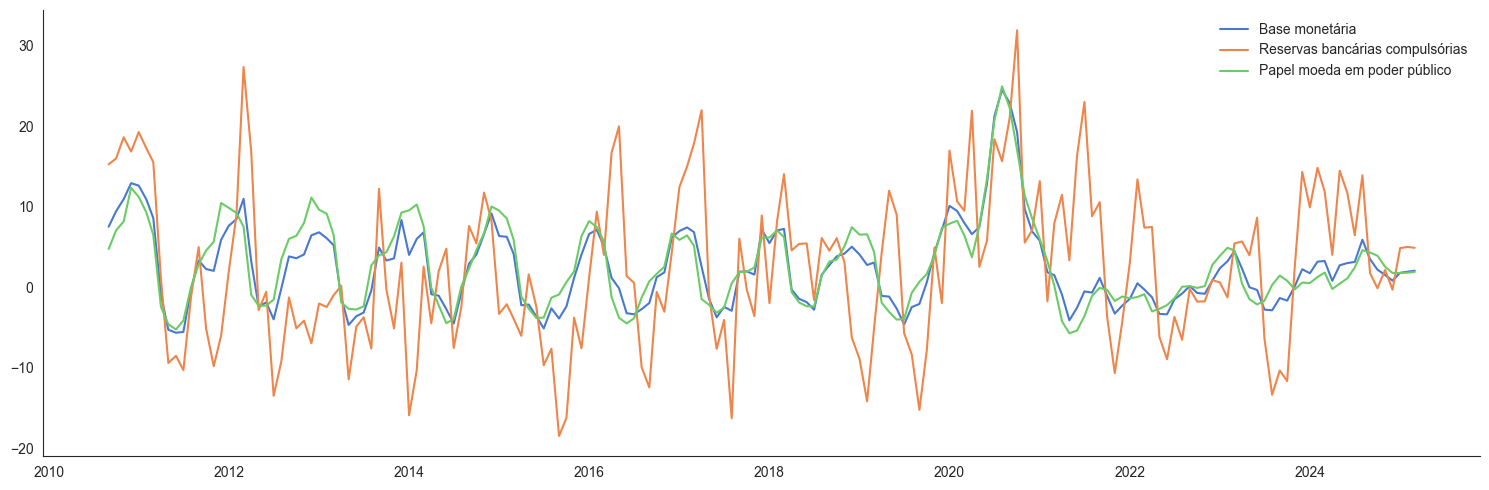

In [197]:
# Graficagem 
tb_3b = tb_3a[['bmr_mm', 'rb_mm', 'mpp_mm']]
tb_3b.rename(columns = {"bmr_mm": "Base monetária", "rb_mm": "Reservas bancárias compulsórias", "mpp_mm": "Papel moeda em poder público"}, inplace=True)
tb_3b_long = tb_3b[["Base monetária", "Reservas bancárias compulsórias", "Papel moeda em poder público"]].reset_index().melt(id_vars='date', var_name='classif', value_name='values')

sns.set_style("white")

plt.figure(figsize=(15, 5))
lineplot = sns.lineplot(
    data=tb_3b_long,
    x='date',
    y='values',
    hue='classif',
    palette="muted"
)

plt.xlabel(None)
plt.ylabel(None)
sns.despine()
plt.legend(frameon=False, loc='upper right')
plt.tight_layout()

plt.show()

#### Exercício 4

##### a.

C:\Users\pedro\AppData\Local\Temp\ipykernel_18356\870754156.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb_4a[f'pib_mm'] = tb_4a["pib"].rolling(window=8).apply(med_mov, raw=False)
C:\Users\pedro\AppData\Local\Temp\ipykernel_18356\870754156.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb_4a[f'desocupados_mm'] = tb_4a["desocupados"].rolling(window=8).apply(med_mov, raw=False)
C:\Users\pedro\AppData\Local\Temp\ipykernel_18356\870754156.py:61: SettingWithCopyWarning: 
A value is trying to be se

<Figure size 1000x500 with 0 Axes>

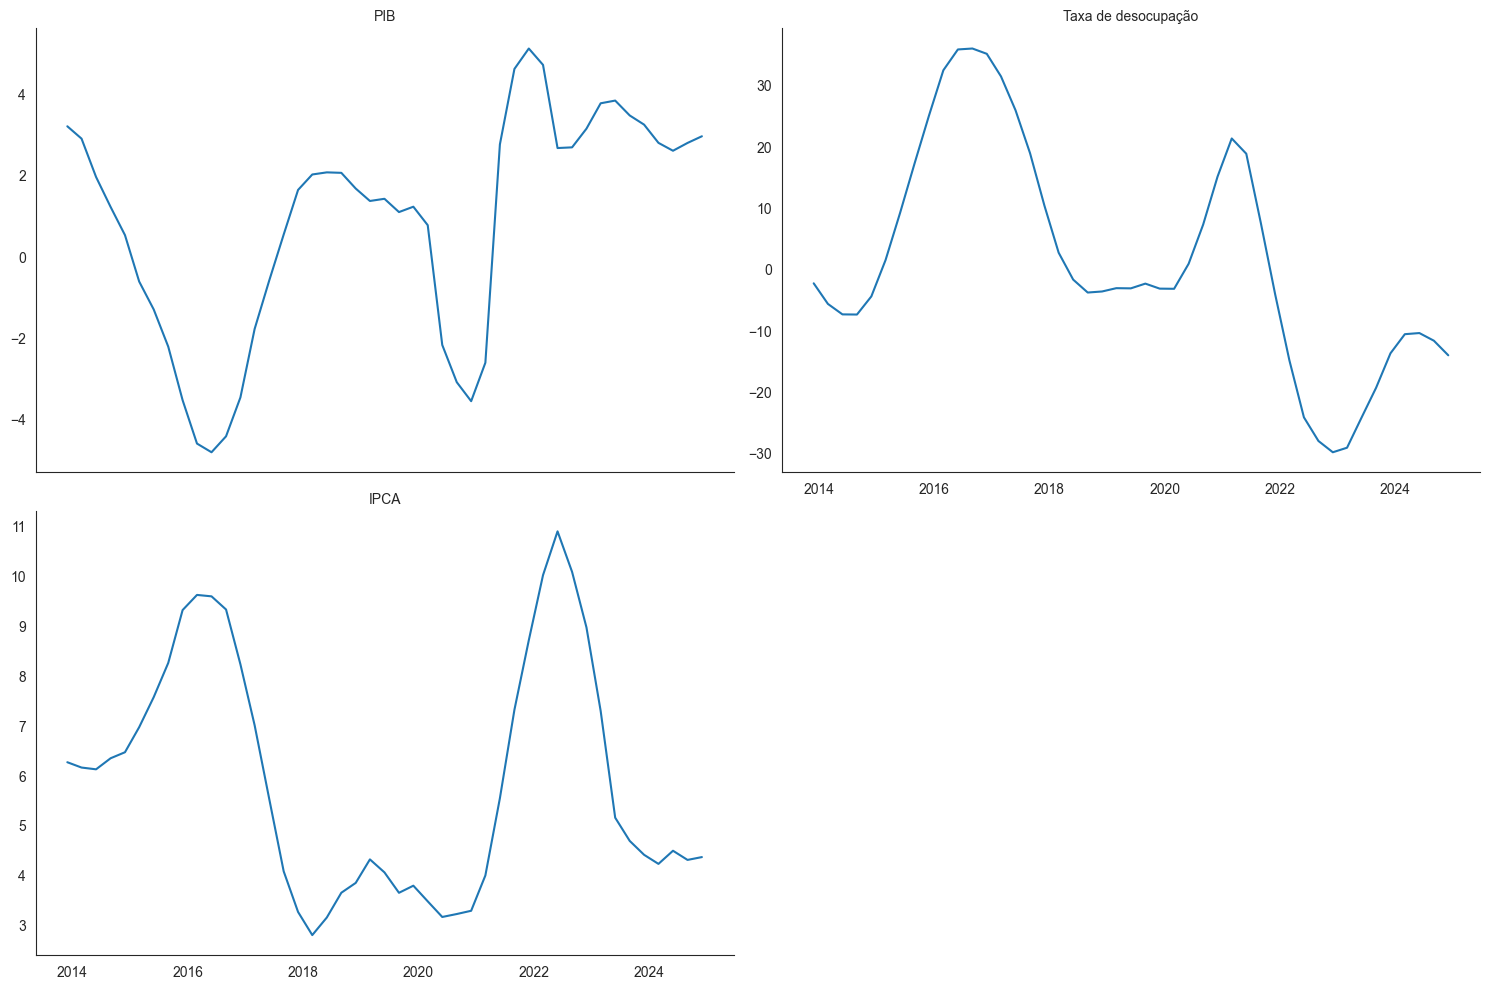

In [230]:
# Requisição
pib_4a_raw = sp.get_table(
    table_code="1621",
    territorial_level="1",
    ibge_territorial_code="all",
    classifications={"11255": "90707"},
    period="all",
    format="pandas"
)
ipca_4a_raw = sp.get_table(
    table_code="1737",
    territorial_level="1",
    ibge_territorial_code="all",
    variable="2266",
    period="all",
    format="pandas"
)
pnad_4a_raw = sp.get_table(
    table_code="6468",
    territorial_level="1",
    ibge_territorial_code="all",
    variable="4099",
    period="all",
    format="pandas"
)

# Tratamento dos dados
pib_4a_raw.columns = pib_4a_raw.iloc[0]
pib_4a_raw = pib_4a_raw.iloc[1:, :]
pib_4a_raw['Valor'] = pib_4a_raw['Valor'].astype(float)
pib_4a = pib_4a_raw.rename(columns = {"Valor" : "pib", "Trimestre (Código)" : "date"})[['date', 'pib']]
pib_4a['date'] = pib_4a['date'].str[:-2] + pib_4a['date'].str[-2:].replace({"01" : "03", "02" : "06", "03" : "09", "04" : "12"})
pib_4a.index = pd.to_datetime(pib_4a['date'], format='%Y%m')
pib_4a.drop(['date'], axis=1, inplace=True)

pnad_4a_raw.columns = pnad_4a_raw.iloc[0]
pnad_4a_raw = pnad_4a_raw.iloc[1:, :]
pnad_4a_raw['Valor'] = pnad_4a_raw['Valor'].astype(float)
pnad_4a = pnad_4a_raw.rename(columns = {"Valor" : "desocupados", "Trimestre (Código)" : "date"})[['date', 'desocupados']]
pnad_4a['date'] = pnad_4a['date'].str[:-2] + pnad_4a['date'].str[-2:].replace({"01" : "03", "02" : "06", "03" : "09", "04" : "12"})
pnad_4a.index = pd.to_datetime(pnad_4a['date'], format='%Y%m')
pnad_4a.drop(['date'], axis=1, inplace=True)


ipca_4a_raw.columns = ipca_4a_raw.iloc[0]
ipca_4a_raw = ipca_4a_raw.iloc[1:, :]
ipca_4a_raw['Valor'] = ipca_4a_raw['Valor'].astype(float)
ipca_4a = ipca_4a_raw.rename(columns = {"Valor" : "ipca", "Mês (Código)" : "date"})[['date', 'ipca']]
ipca_4a.index = pd.to_datetime(ipca_4a['date'], format='%Y%m')
ipca_4a.drop(['date'], axis=1, inplace=True)
ipca_4a

tb_4a = pnad_4a
tb_4a[['pib']] = pib_4a[['pib']]
tb_4a[['ipca']] = ipca_4a[['ipca']]
tb_4a = tb_4a[['pib', 'desocupados', 'ipca']]

# Calcular médias móveis
tb_4a[f'pib_mm'] = tb_4a["pib"].rolling(window=8).apply(med_mov, raw=False)
tb_4a[f'desocupados_mm'] = tb_4a["desocupados"].rolling(window=8).apply(med_mov, raw=False)
tb_4a[f'ipca_mm'] = tb_4a["ipca"].rolling(window=8).apply(med_mov, raw=False)

# Graficagem

tb_4a.rename(columns = {"pib_mm": "PIB", "desocupados_mm": "Taxa de desocupação", "ipca_mm": "IPCA"}, inplace=True)
tb_4a_long = tb_4a[["PIB", "Taxa de desocupação", "IPCA"]].reset_index().melt(id_vars='date', var_name='classif', value_name='values')

sns.set_style("white")

plt.figure(figsize=(10, 5))
relplot = sns.relplot(
    data=tb_4a_long,
    x='date',
    y='values',
    col='classif',
    kind='line',   
    col_wrap=2, 
    height=5,    
    aspect=1.5,  
    facet_kws={'sharey': False, 'sharex': True}, # Don't share y-axis, share x-axis
    palette="muted"
)
relplot.set_titles("{col_name}")
relplot.set_axis_labels("", "")

plt.xlabel(None)
plt.ylabel(None)
sns.despine()
plt.legend(frameon=False, loc='lower left')
plt.tight_layout()

plt.show()